In [1]:
# ****-------Notebook Summary----***

#Data Science, Machine Learning,Deep Learning(Artificial Neural Networks(ANN))

#Data Visualization,EDA Analysis, Data Pre-processing,Data Manipulation,Data Cleaning,Data Split
#-------------------------------------------------------------------------------------------------
#Machine Learning Algorithm:

#Apply into Model or Classifiar:

#Part1= Decision Tree; Accuracy=()

#Part2 =Random forest;Accuracy=()

#Part3 =XGBoost Classifier;Accuracy=()

#Part4 =Logistic Regression;Accuracy=()

#Part5 =k-nearest neighbors algorithm (k-NN);Accuracy=()

##(UnSupervised Machine Learning Algorithm)

#Part6=K-means Clustering or Partition clustering

#Part7=Hierarchical Clustering or Agglomerative clustering.

#---------------
#Deep learning -> Artificial Nueral Networks(ANN)

#Part8 =ANN model;Accuracy=()

#Visualize output at graph, CM Matrix,Accuracy Report, #Predication into sample Data

In [2]:
#Environment Setup:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/epitope-prediction/input_sars.csv
/kaggle/input/epitope-prediction/input_covid.csv
/kaggle/input/epitope-prediction/input_bcell.csv


In [3]:
#Basic Python lib
import numpy
import pandas

#Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#tf 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics

from sklearn.metrics import classification_report,confusion_matrix



In [4]:
#Data Read
file_path = '../input/epitope-prediction'
bcell_df = pd.read_csv(f'{file_path}/input_bcell.csv')
covid_df = pd.read_csv(f'{file_path}/input_covid.csv')
sars_df = pd.read_csv(f'{file_path}/input_sars.csv')

In [5]:
#Data Visualization,EDA Analysis, Data Pre-processing,Data Manipulation,Data Cleaning,Data Split

In [6]:
bcell_df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [7]:
df_bellsars = pd.concat([bcell_df,sars_df],axis = 0)
df_bellsars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [8]:
df_bellsars = df_bellsars.sample(frac=1).reset_index(drop=True)
df_bellsars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,C0H571,MIKVTIFLLLSIFSFNLYGLELNEKVSIKYGAEQGVGSADSNTKLC...,1291,1305,CMGKSTYLTEPILTE,0.964,0.277,1.024,1.340,8.430481,0.130624,-0.419739,36.431807,0
1,P10155,MEESVNQMQPLNEKQIANSQDGYVWQVTDMNRLHRFLCFGSEGGTY...,509,523,ADPDDRGMLDMCGFD,1.142,0.459,0.966,2.960,8.272888,0.072491,-0.189591,30.442026,0
2,P20916,MIFLTALPLFWIMISASRGGHWGAWMPSSISAFEGTCVSIPCRFDF...,259,273,LLCGADSNPPPLLTW,1.113,0.144,1.067,-0.173,4.971985,0.087859,-0.101438,47.006230,0
3,Q7T9D9,MGGLSLLQLPRDKFRKSSFFVWVIILFQKAFSMPLGVVTNSTLEVT...,157,171,GAFFLYDRLASTVIY,0.887,0.082,1.080,-1.100,5.970520,0.079882,-0.352367,43.387870,0
4,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0


In [9]:
df_bellsars = df_bellsars.drop(['parent_protein_id','protein_seq','peptide_seq'],axis = 1)
df_bellsars.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,1291,1305,0.964,0.277,1.024,1.340,8.430481,0.130624,-0.419739,36.431807,0
1,509,523,1.142,0.459,0.966,2.960,8.272888,0.072491,-0.189591,30.442026,0
2,259,273,1.113,0.144,1.067,-0.173,4.971985,0.087859,-0.101438,47.006230,0
3,157,171,0.887,0.082,1.080,-1.100,5.970520,0.079882,-0.352367,43.387870,0
4,285,299,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0


In [10]:
df=df_bellsars.copy()

In [11]:
df.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000
mean,308.845173,319.519420,0.994906,1.082811,1.021808,1.750098,7.015227,0.077143,-0.394063,43.337674,0.271148
std,358.433563,358.647859,0.123656,1.826098,0.053430,1.954424,1.875713,0.026388,0.392808,16.501627,0.444567
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,86.000000,96.000000,0.913000,0.244000,0.987000,0.600000,5.569763,0.062500,-0.600131,31.725753,0.000000
50%,197.000000,208.000000,0.991000,0.551000,1.021000,1.775000,6.447815,0.075949,-0.318259,41.948275,0.000000
75%,400.000000,411.000000,1.073000,1.208500,1.055000,2.960000,8.676575,0.093458,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,40.605000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_position       14907 non-null  int64  
 1   end_position         14907 non-null  int64  
 2   chou_fasman          14907 non-null  float64
 3   emini                14907 non-null  float64
 4   kolaskar_tongaonkar  14907 non-null  float64
 5   parker               14907 non-null  float64
 6   isoelectric_point    14907 non-null  float64
 7   aromaticity          14907 non-null  float64
 8   hydrophobicity       14907 non-null  float64
 9   stability            14907 non-null  float64
 10  target               14907 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.3 MB


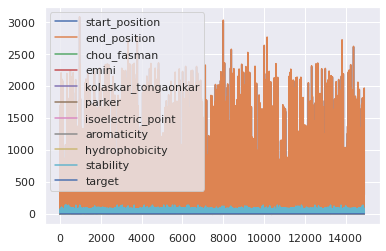

In [13]:
import seaborn; seaborn.set()
df.plot();

In [14]:
df.corr()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
start_position,1.000000,0.999879,0.043024,0.005256,-0.024245,-0.016742,-0.254532,0.293748,0.017894,-0.111249,-0.069670
end_position,0.999879,1.000000,0.043142,0.006068,-0.023674,-0.016808,-0.255655,0.296115,0.018821,-0.111592,-0.068740
chou_fasman,0.043024,0.043142,1.000000,0.218351,-0.444670,0.591388,0.013580,0.006985,-0.139379,0.113538,0.086152
emini,0.005256,0.006068,0.218351,1.000000,-0.390292,0.406209,-0.011099,0.047156,0.034106,-0.015297,0.083406
kolaskar_tongaonkar,-0.024245,-0.023674,-0.444670,-0.390292,1.000000,-0.689073,-0.015619,0.123673,0.300496,-0.031797,-0.029176
parker,-0.016742,-0.016808,0.591388,0.406209,-0.689073,1.000000,-0.007636,-0.185735,-0.300575,0.082557,0.029428
isoelectric_point,-0.254532,-0.255655,0.013580,-0.011099,-0.015619,-0.007636,1.000000,-0.214171,-0.210717,0.213725,-0.127695
aromaticity,0.293748,0.296115,0.006985,0.047156,0.123673,-0.185735,-0.214171,1.000000,0.322835,-0.256461,0.037519
hydrophobicity,0.017894,0.018821,-0.139379,0.034106,0.300496,-0.300575,-0.210717,0.322835,1.000000,-0.409077,0.100575
stability,-0.111249,-0.111592,0.113538,-0.015297,-0.031797,0.082557,0.213725,-0.256461,-0.409077,1.000000,0.030254


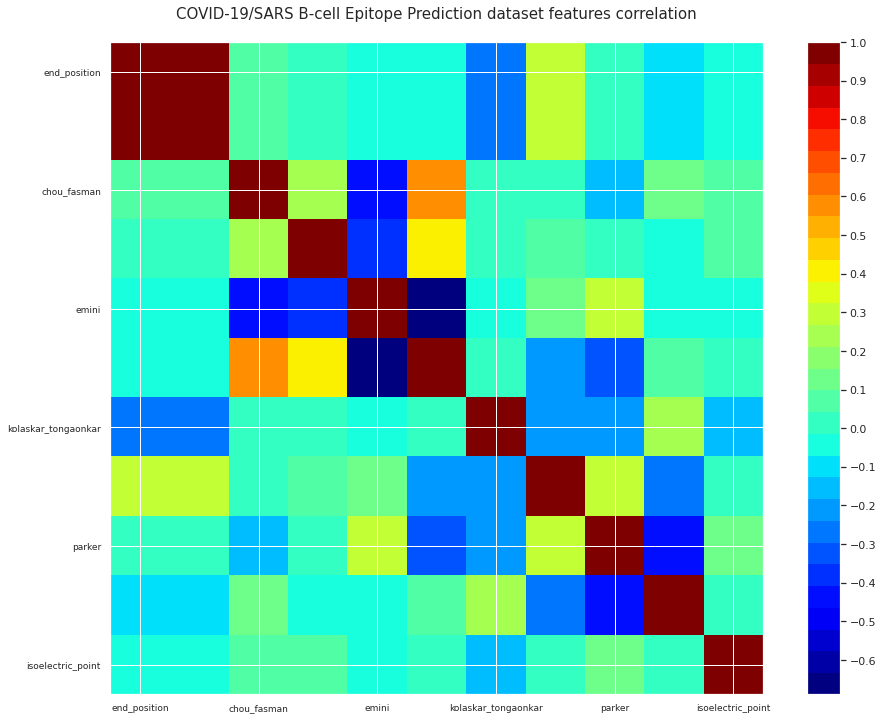

In [15]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('COVID-19/SARS B-cell Epitope Prediction dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)


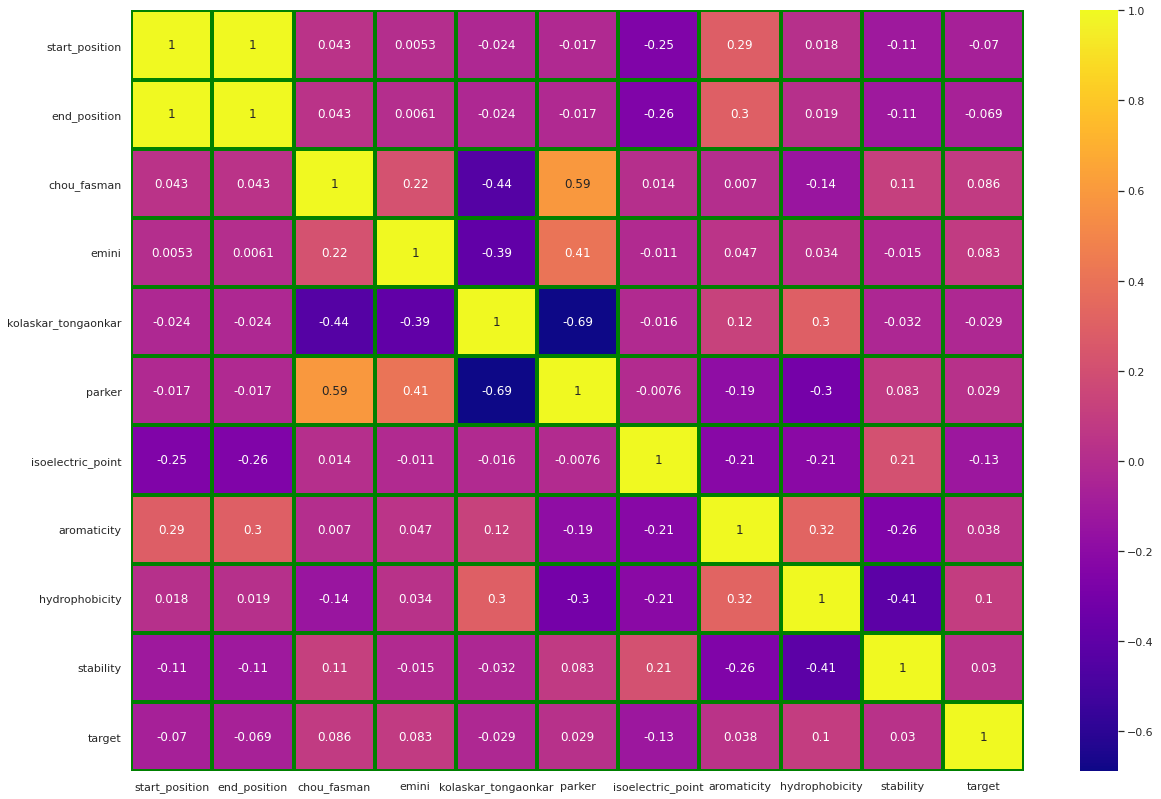

In [16]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')

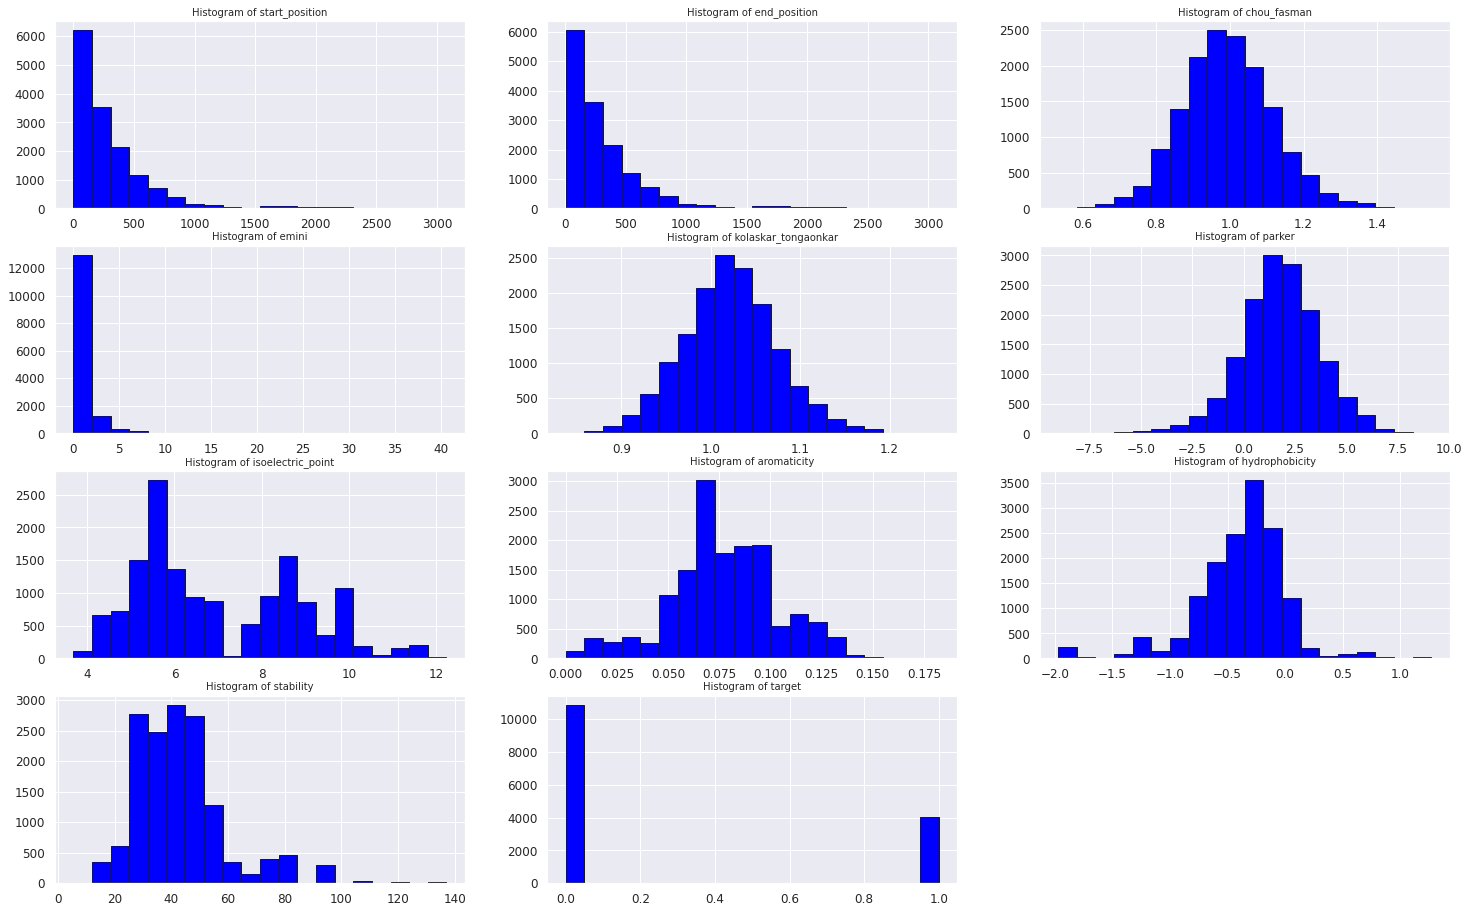

In [17]:
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='blue',edgecolor='k')
    i+=1
plt.show()

In [18]:
df.apply(lambda x: sum(x.isnull()),axis=0)

start_position         0
end_position           0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

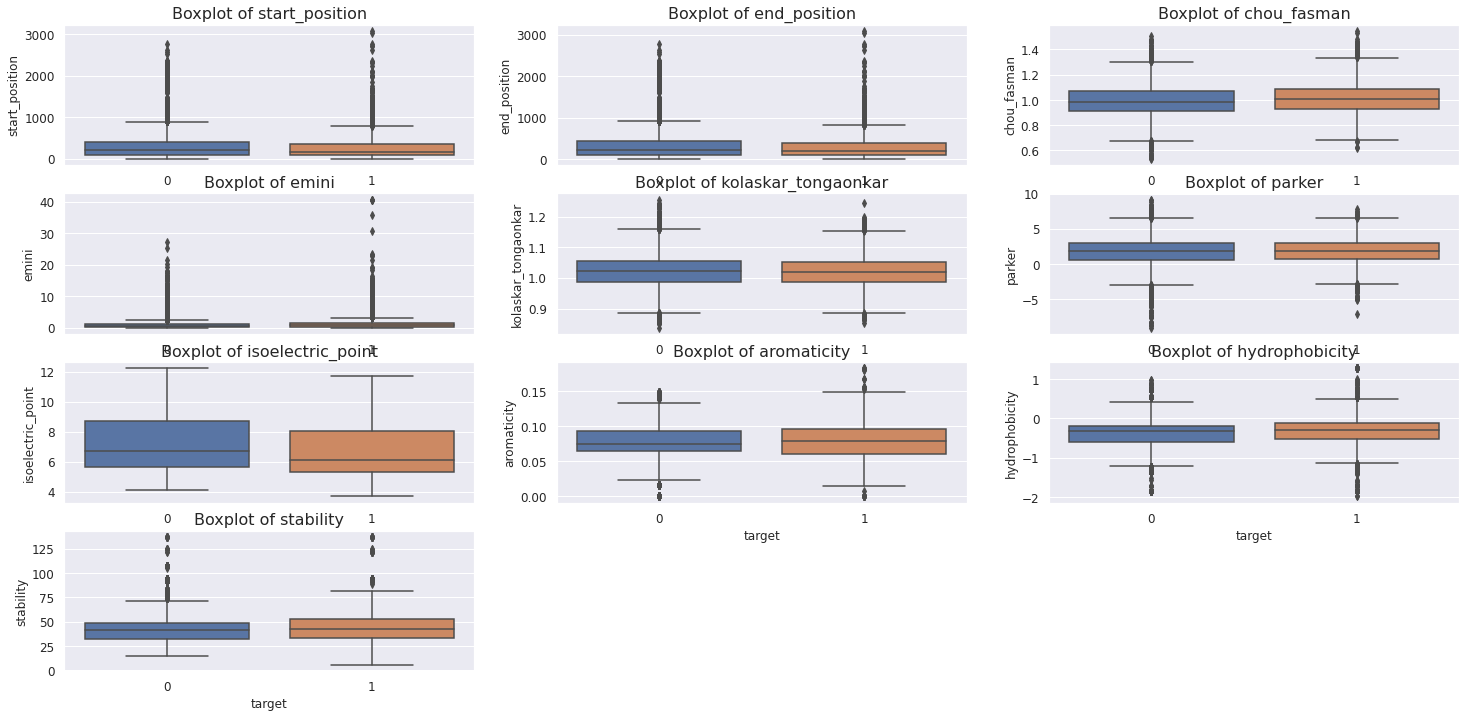

In [19]:
i=1
plt.figure(figsize=(25,15))
for c in df.columns[:-1]:
    plt.subplot(5,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['target'])
    i+=1
plt.show()

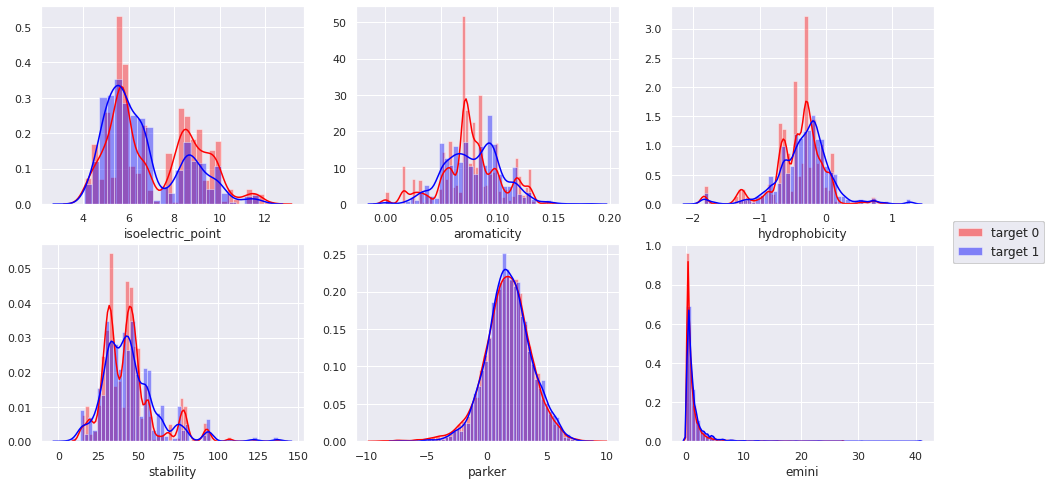

In [20]:
idx_train = df['target'].astype("bool").values
fig, axes = plt.subplots(2, 3,figsize=(16,8))
sns.set_style('darkgrid')
axes = [x for a in axes for x in a]
for i,name in enumerate(["isoelectric_point", "aromaticity", "hydrophobicity", "stability", "parker", "emini"]):
    value = df[name]
    sns.distplot(value[~idx_train],ax = axes[i], color='red')
    sns.distplot(value[idx_train],ax = axes[i], color = 'blue')
    axes[i].set_xlabel(name,fontsize=12)
    fig.legend(labels = ["target 0","target 1"],loc="right",fontsize=12)

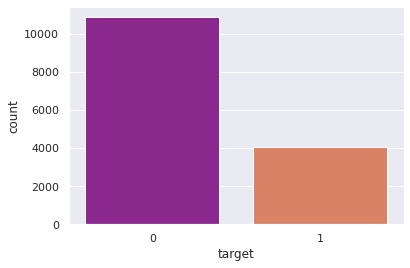

In [21]:
#checking the target variable countplot
sns.countplot(data=df,x = 'target',palette='plasma')

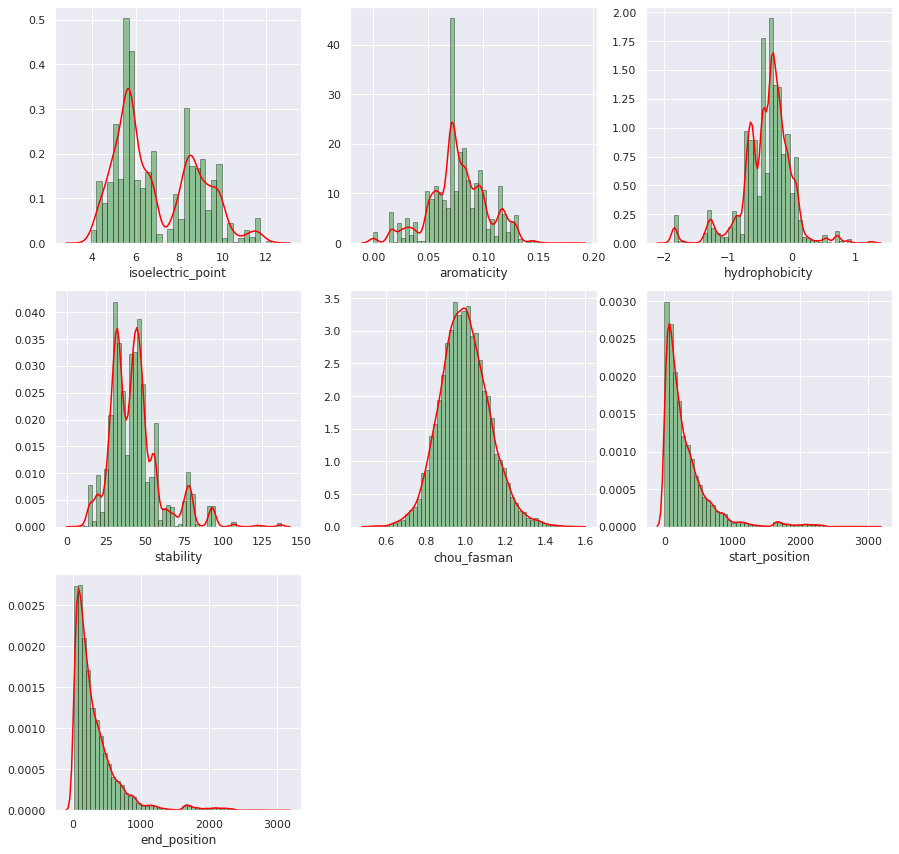

In [22]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability', 'chou_fasman', 'start_position', 'end_position']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='green'),color='red')
    cnt+=1
plt.show() 

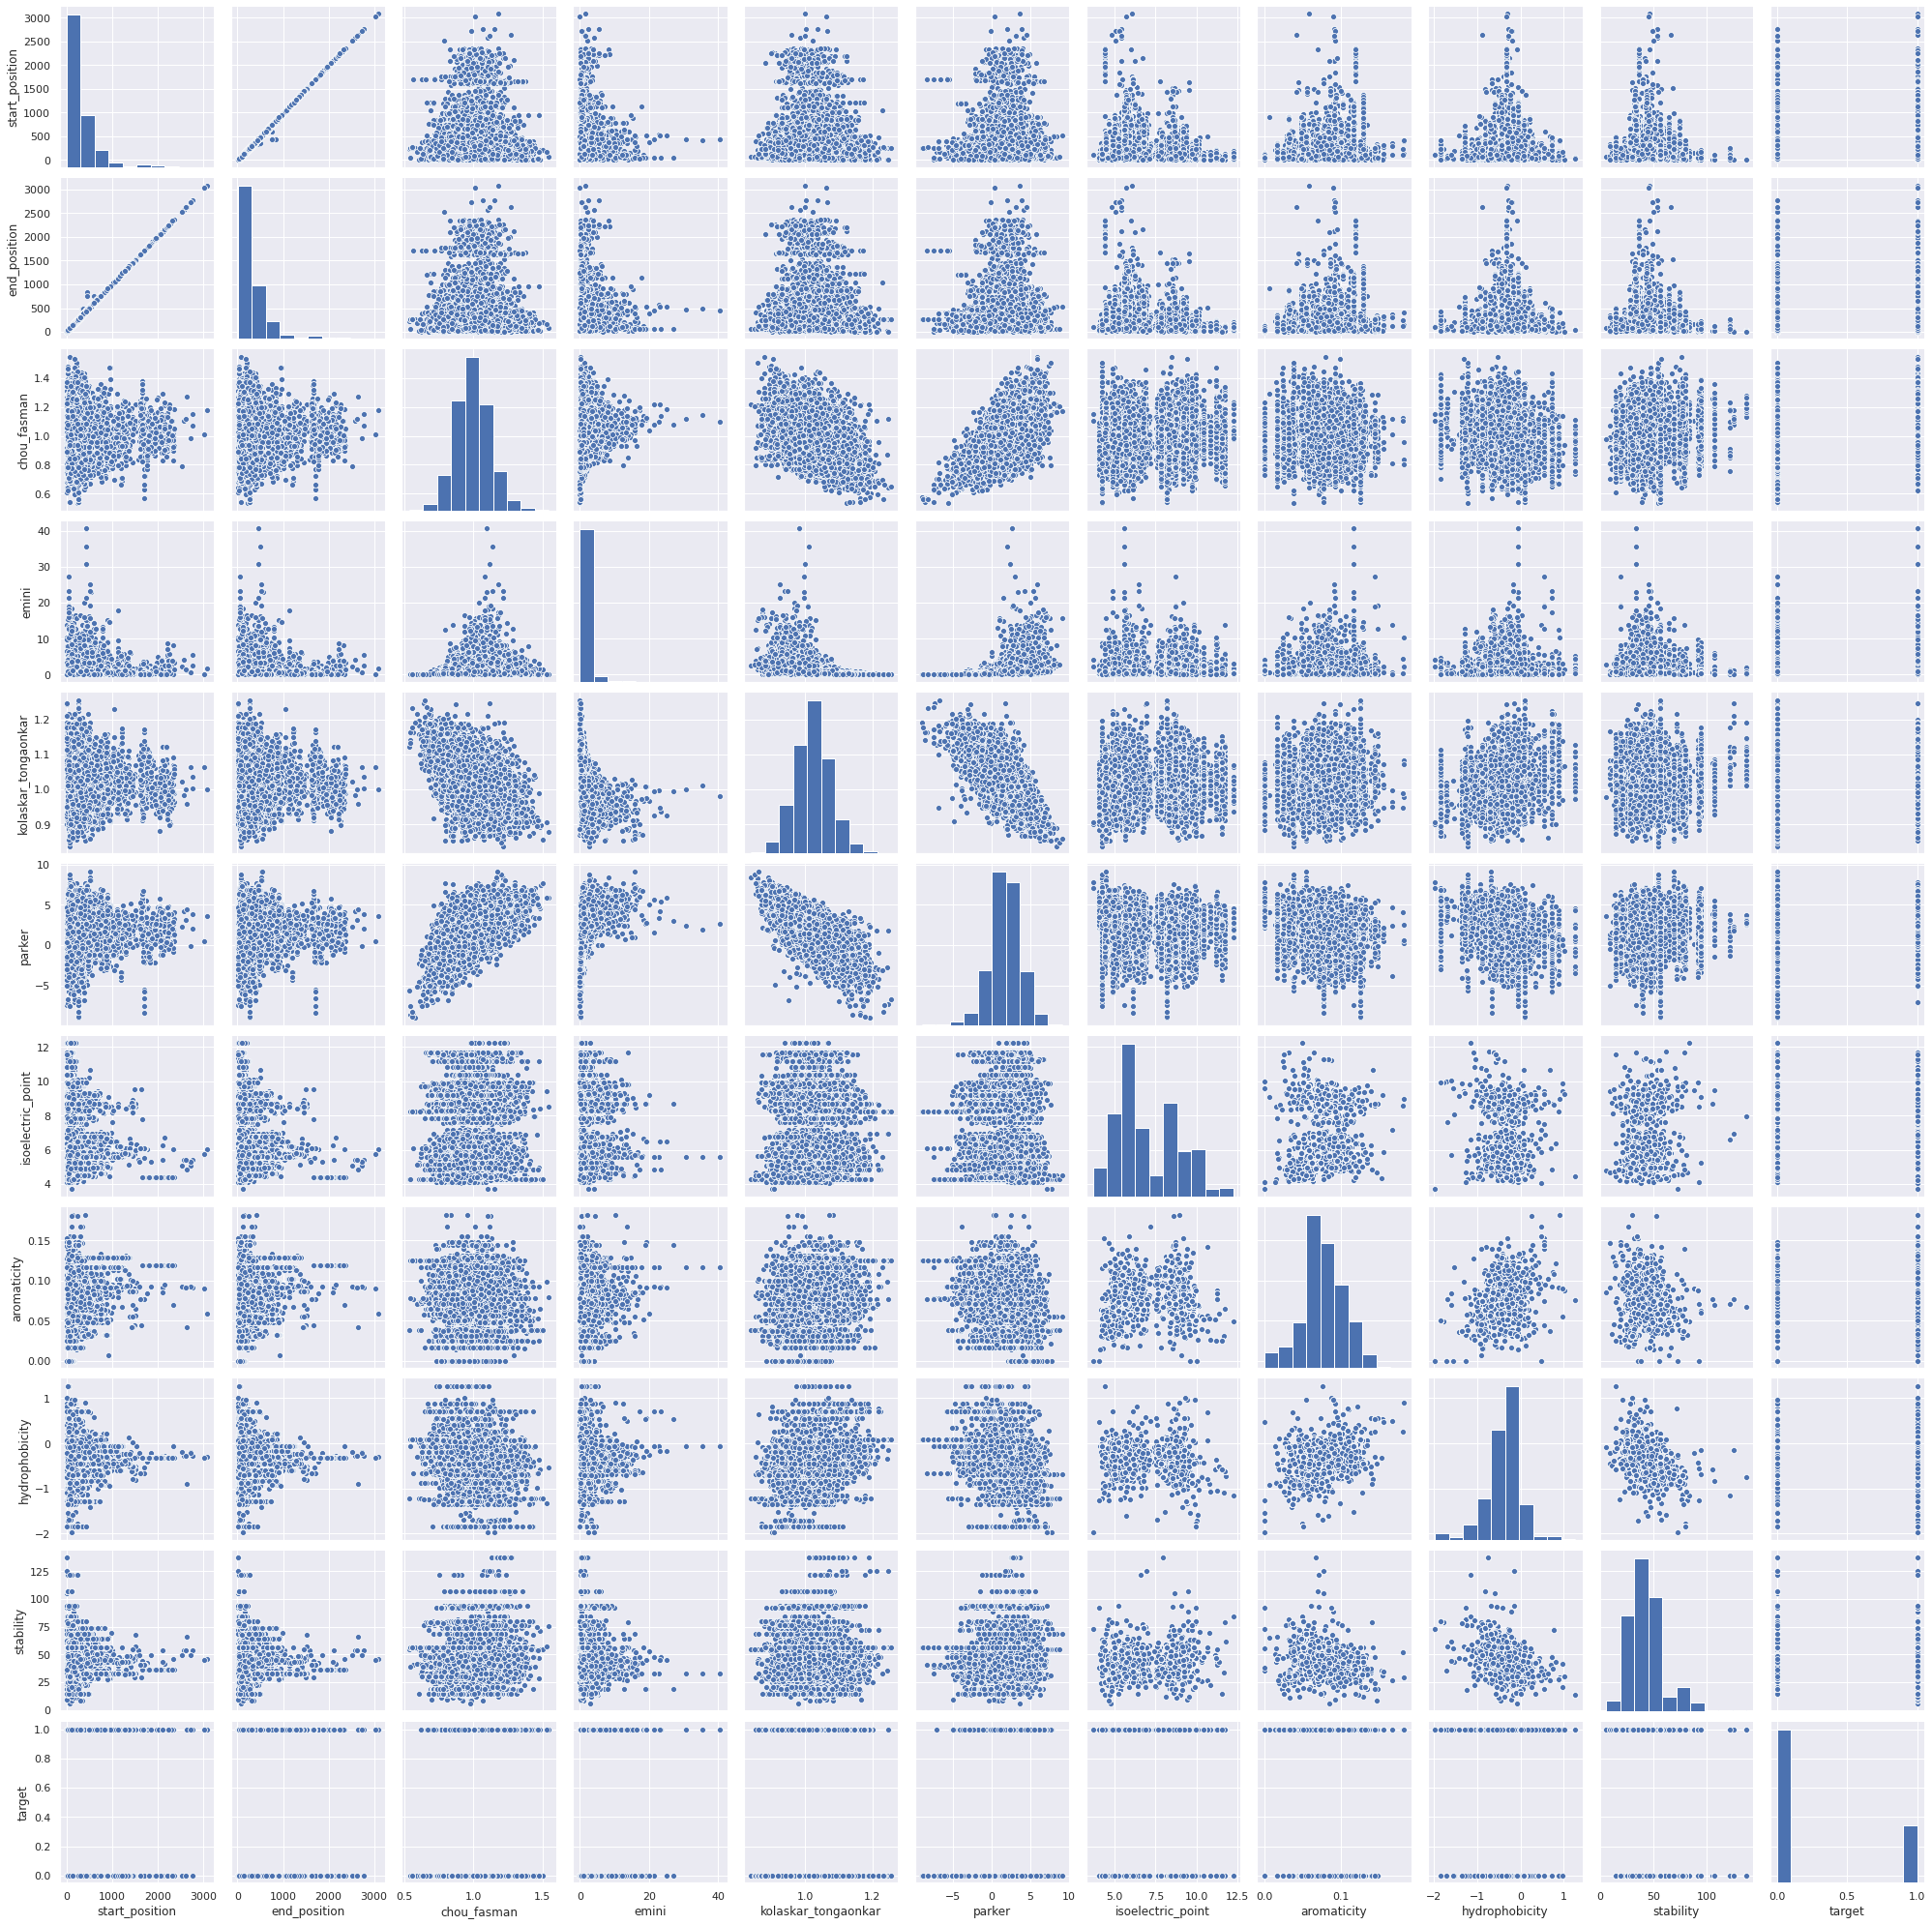

In [23]:
sns.pairplot(df)
plt.show()

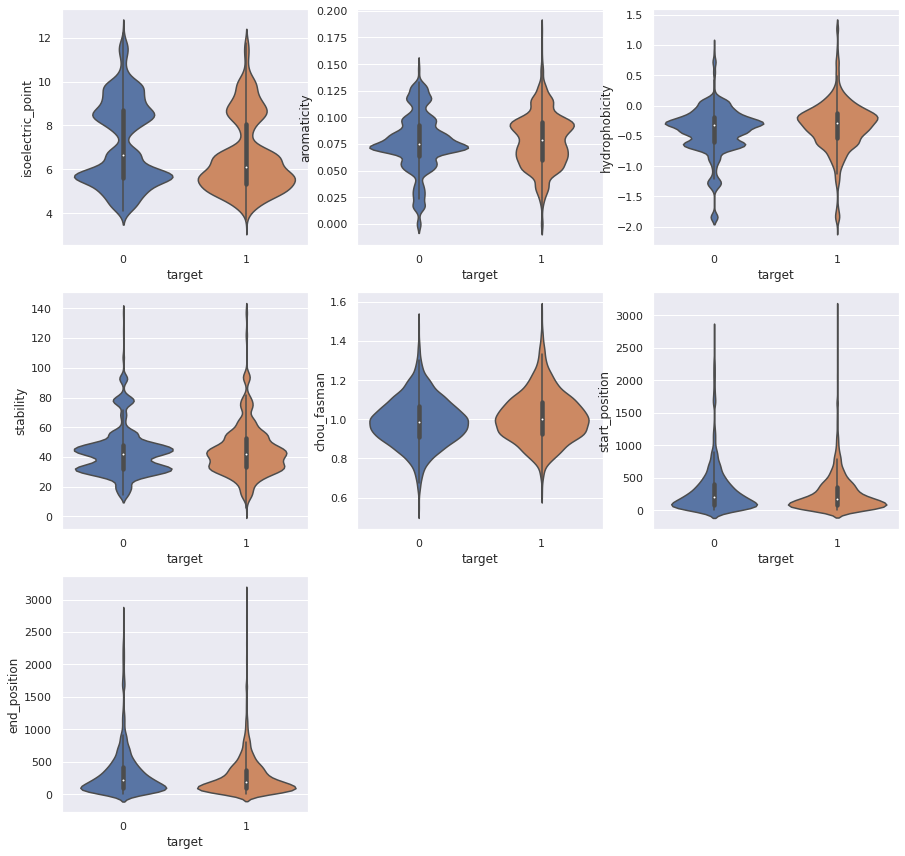

In [24]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability', 'chou_fasman', 'start_position', 'end_position']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="target", y=col, data=df)
    cnt+=1
plt.show()

In [25]:
#Feature Extraction & Splitting 

In [26]:
y= df['target']

X = df.drop(['target'],axis = 1)

In [27]:
forest_clf = ExtraTreesClassifier(n_estimators=1000, random_state=42)
forest_clf.fit(X,y)

ExtraTreesClassifier(n_estimators=1000, random_state=42)

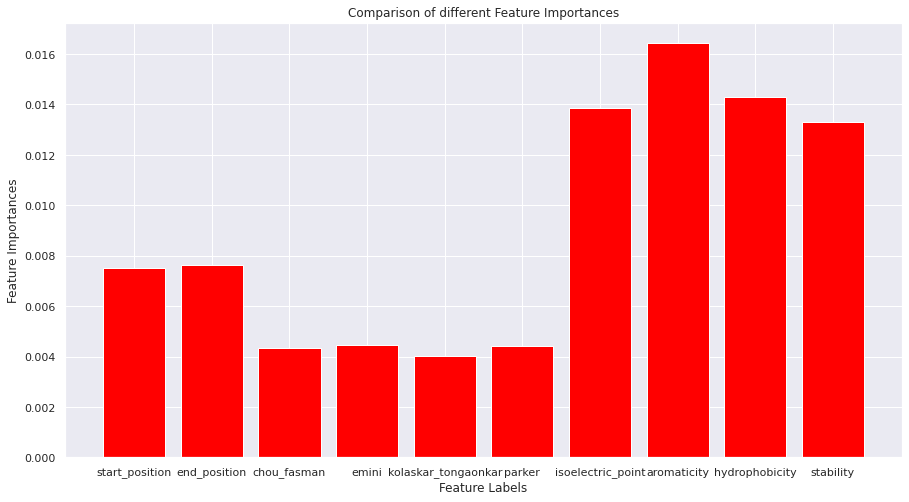

In [28]:
imp_features = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis = 0)
 
plt.figure(figsize = (15,8))
plt.bar(X.columns, std, color = 'red') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

In [29]:
ec = ExtraTreesClassifier()
ec.fit(X,y)

ExtraTreesClassifier()

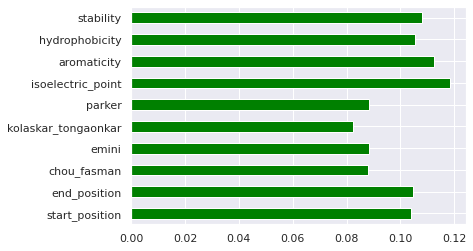

In [30]:
ec_series = pd.Series(ec.feature_importances_,index=X.columns)
ec_series.plot(kind = 'barh',color = 'green')

In [31]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [32]:
dims = X_train.shape[1]
print(dims, 'dims')

10 dims


In [33]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print(y_train)

9768     0
3778     0
12042    0
7880     0
14870    0
        ..
2041     1
11272    0
11735    1
594      1
7720     0
Name: target, Length: 12670, dtype: int64


In [35]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
cr = classification_report(y_test,rfc_pred)

In [39]:
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1637
           1       0.79      0.66      0.72       600

    accuracy                           0.86      2237
   macro avg       0.83      0.80      0.81      2237
weighted avg       0.86      0.86      0.86      2237



In [40]:
#Models performance Analysis with scaling(standard Scaler)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
list_models=[]
list_scores=[]
x_train=sc.fit_transform(X_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
pred_1=lr.predict(sc.transform(X_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')

In [42]:
score_1

0.739830129637908

In [43]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(X_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)
    

In [44]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')

In [45]:
print(max(list_1))

0.7939204291461779


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

In [47]:
score_2

0.8600804649083594

In [48]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(X_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [49]:
score_3

0.7568171658471167

In [50]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(X_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [51]:
score_4

0.8417523468931605

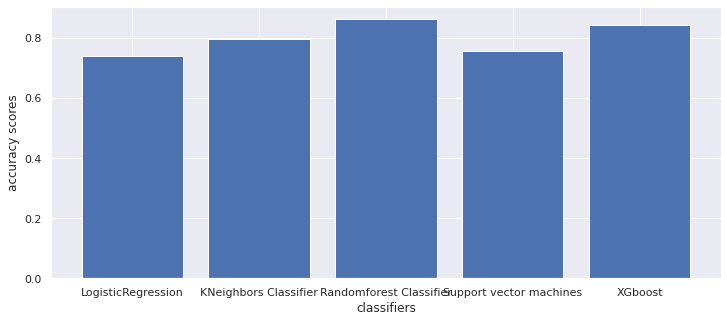

In [52]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()

In [53]:
#Additional Part-1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [54]:
#DT
clf = DecisionTreeClassifier(random_state=7)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [55]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [56]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=7,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

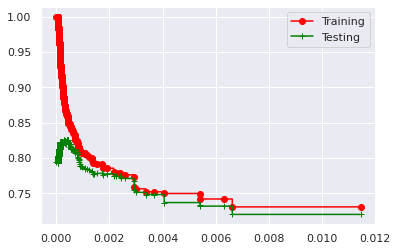

In [57]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]

plt.plot(ccp_alphas,train_score,label = 'Training',color = 'red',marker = 'o',drawstyle = 'steps-post')
plt.plot(ccp_alphas,test_score,label = 'Testing',color = 'green',marker = '+',drawstyle = 'steps-post')
plt.legend()
plt.show()

In [58]:
#Random forest, Parameter tuning

In [59]:
params = {
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators' : [int(x) for x in np.linspace(100,1200,10)],
            'max_depth': [int(x) for x in np.linspace(1,50,10)],
            'min_samples_split': [1,2,5,10],
            'min_samples_leaf': [1,2,5,10],
            'ccp_alpha':[0.0025,0.0030,0.0045,0.005],
            'criterion':['gini','entropy'],
        }
    },
}

In [60]:
score = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter=10,scoring='accuracy',verbose=2)
    clf.fit(X_train,y_train)
    score.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045, total=   2.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045, total=   2.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045, total=   2.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045, total=   2.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_depth=39, criterion=gini, ccp_alpha=0.0045, total=   2.3s
[CV] n_estimators=588, min_samples_split=2, min_samples_leaf=10, max_depth=22, criterion=entropy, ccp_alpha=0.0045 
[CV]  n_estimators=588, min_samples_spli

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005, total=   0.9s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005, total=   0.9s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005, total=   0.9s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005, total=   0.9s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_depth=28, criterion=gini, ccp_alpha=0.005, total=   0.9s
[CV] n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025 
[CV]  n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025, total=   4.0s
[CV] n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025 
[CV]  n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025, total=   3.9s
[CV] n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025 
[CV]  n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025, total=   3.9s
[CV] n_estimators=711, min_samples_split=10, min_samples_leaf=1, max_depth=1, criterion=entropy, ccp_alpha=0.0025 
[CV]  n_estimators=711,

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025, total=   0.2s
[CV] n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025 
[CV]  n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025, total=   0.2s
[CV] n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025, total=   0.2s
[CV] n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025 
[CV]  n_estimators=222, min_samples_split=1, min_samples_leaf=2, max_depth=39, criterion=entropy, ccp_alpha=0.0025, total=   0.2s
[CV] n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005, total=   0.5s
[CV] n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005, total=   0.5s
[CV] n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005, total=   0.5s
[CV] n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005, total=   0.5s
[CV] n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=711, min_samples_split=1, min_samples_leaf=5, max_depth=44, criterion=entropy, ccp_alpha=0.005, total=   0.5s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025, total=   2.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025, total=   2.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025, total=   2.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_depth=28, criterion=gini, ccp_alpha=0.0025 
[CV]  n_estimators=100, min_samples

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045, total=   0.3s
[CV] n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045, total=   0.3s
[CV] n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045, total=   0.3s
[CV] n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045, total=   0.4s
[CV] n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045 


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

[CV]  n_estimators=466, min_samples_split=1, min_samples_leaf=5, max_depth=17, criterion=gini, ccp_alpha=0.0045, total=   0.3s
[CV] n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005 
[CV]  n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005, total=   4.8s
[CV] n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005 
[CV]  n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005, total=   4.7s
[CV] n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005 
[CV]  n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005, total=   4.7s
[CV] n_estimators=222, min_samples_split=10, min_samples_leaf=10, max_depth=39, criterion=gini, ccp_alpha=0.005 
[CV]  n_estimators=222, min_samples_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


In [61]:
score_df = pd.DataFrame(score,columns=['model_name','best_score','best_estimator'])
score_df

,model_name,best_score,best_estimator
0,RandomForest,0.765115,"(DecisionTreeClassifier(ccp_alpha=0.0025, max_..."


In [62]:
for i in score_df['best_estimator']:
    print(i)
    print("="*100)

RandomForestClassifier(ccp_alpha=0.0025, max_depth=28, min_samples_leaf=10,
                       min_samples_split=5)


[Text(513.3599999999999, 454.2942857142857, 'hydrophobicity <= -0.189\ngini = 0.393\nsamples = 11925\nvalue = [8717, 3208]\nclass = has'),
 Text(348.19199999999995, 384.40285714285716, 'isoelectric_point <= 7.812\ngini = 0.349\nsamples = 8975\nvalue = [6950, 2025]\nclass = has'),
 Text(232.128, 314.51142857142855, 'stability <= 43.388\ngini = 0.402\nsamples = 5223\nvalue = [3765, 1458]\nclass = has'),
 Text(142.84799999999998, 244.62, 'hydrophobicity <= -0.299\ngini = 0.35\nsamples = 3813\nvalue = [2950, 863]\nclass = has'),
 Text(107.136, 174.7285714285714, 'hydrophobicity <= -0.319\ngini = 0.31\nsamples = 3229\nvalue = [2611, 618]\nclass = has'),
 Text(71.42399999999999, 104.83714285714285, 'isoelectric_point <= 5.598\ngini = 0.382\nsamples = 2300\nvalue = [1709, 591]\nclass = has'),
 Text(35.711999999999996, 34.945714285714246, 'gini = 0.499\nsamples = 431\nvalue = [207, 224]\nclass = does not have'),
 Text(107.136, 34.945714285714246, 'gini = 0.316\nsamples = 1869\nvalue = [1502, 3

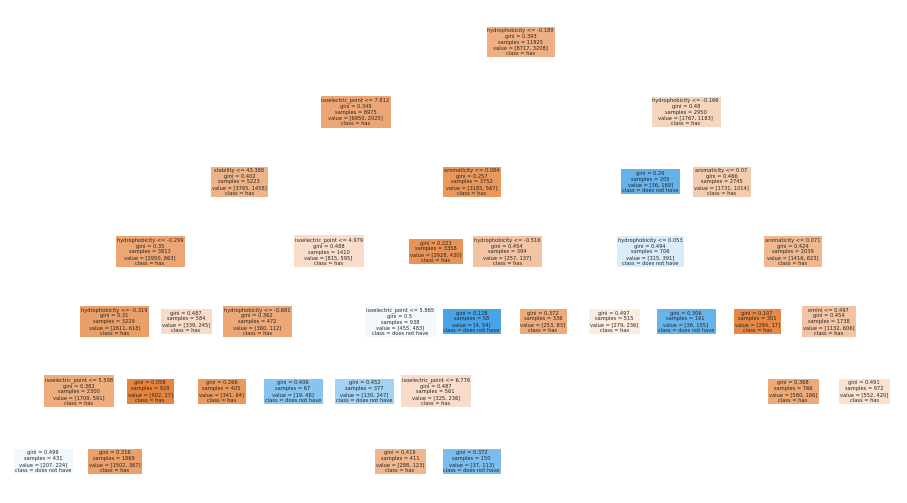

In [63]:
dt = DecisionTreeClassifier(ccp_alpha=0.0025)
dt.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dt,filled=True,feature_names=X.columns,class_names=['has','does not have'])

In [64]:
rf = RandomForestClassifier(ccp_alpha=0.0025, criterion='entropy', max_depth=39,
                       min_samples_leaf=2, n_estimators=1000)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.789403085177733

In [65]:
xgb = XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.7795918367346939,
              learning_rate=0.325, max_delta_step=0, max_depth=22,
              min_child_weight=1, missing=None, n_estimators=833, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.25, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

0.9981551362683438

In [66]:
xgb.score(X_test,y_test)

0.8420523138832998

In [67]:
y_predxgb = xgb.predict(X_test)
y_predxgb = np.array(y_predxgb)
y_testxgb = np.array(y_test)
xgb_actual = pd.DataFrame(y_testxgb)
xgb_predicted = pd.DataFrame(y_predxgb)
xgb_df = pd.concat([xgb_actual,xgb_predicted],axis = 1)
xgb_df.columns = ['Actual','Predicted']
xgb_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2977,0,0
2978,0,0
2979,0,0
2980,1,1


In [68]:
import seaborn as sn

In [69]:
for i in xgb_df.columns:
    print(f' count of <{i}> ia {xgb_df[i].value_counts()}')
    print("="*100)

 count of <Actual> ia 0    2148
1     834
Name: Actual, dtype: int64
 count of <Predicted> ia 0    2275
1     707
Name: Predicted, dtype: int64


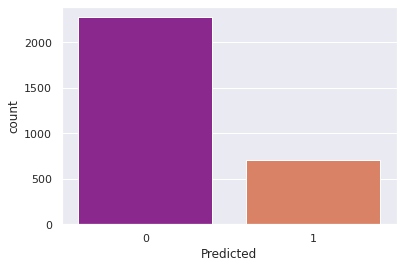

In [70]:
sn.countplot(data = xgb_df,x = 'Predicted',palette='plasma')

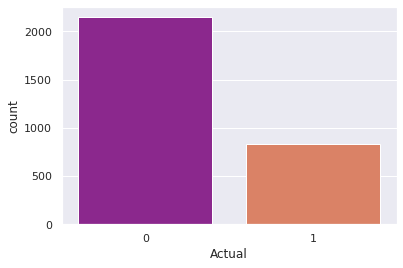

In [71]:
sn.countplot(data = xgb_df,x = 'Actual',palette='plasma')

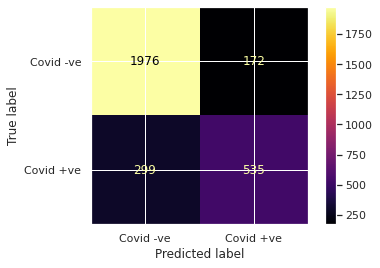

In [72]:
metrics.plot_confusion_matrix(xgb,X_test,y_test,cmap='inferno',display_labels=['Covid -ve','Covid +ve'])

In [73]:
#Rf
y_predrf = rf.predict(X_test)
y_predrf = np.array(y_predrf)
y_testrf = np.array(y_test)
rf_actual = pd.DataFrame(y_testrf)
rf_predict = pd.DataFrame(y_predrf)
rf_df = pd.concat([rf_actual,rf_predict],axis = 1)
rf_df.columns = ['Actual','Predicted']

In [74]:
for i in rf_df.columns:
    print(f' count of <{i}> ia {rf_df[i].value_counts()}')
    print("="*100)

 count of <Actual> ia 0    2148
1     834
Name: Actual, dtype: int64
 count of <Predicted> ia 0    2590
1     392
Name: Predicted, dtype: int64


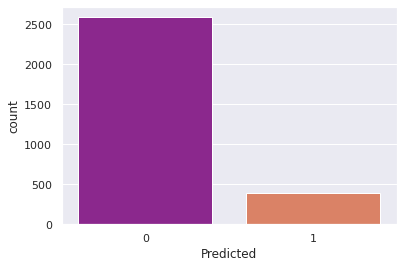

In [75]:
sn.countplot(data = rf_df,x = 'Predicted',palette='plasma')

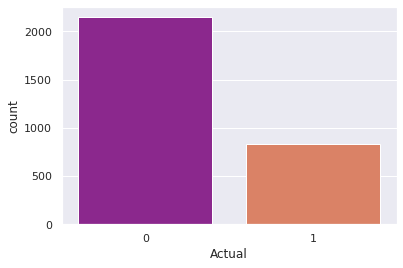

In [76]:
sn.countplot(data = rf_df,x = 'Actual',palette='plasma')

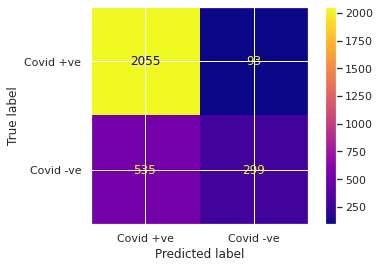

In [77]:
metrics.plot_confusion_matrix(rf,X_test,y_test,cmap = 'plasma',display_labels=['Covid +ve','Covid -ve'])

In [78]:
rf_report = metrics.classification_report(y_test,y_predrf)
xgb_report = metrics.classification_report(y_test,y_predxgb)
print(f' report of RandomForest is {rf_report}\n\n report of XGBmodel is {xgb_report}')

 report of RandomForest is               precision    recall  f1-score   support

           0       0.79      0.96      0.87      2148
           1       0.76      0.36      0.49       834

    accuracy                           0.79      2982
   macro avg       0.78      0.66      0.68      2982
weighted avg       0.78      0.79      0.76      2982


 report of XGBmodel is               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2148
           1       0.76      0.64      0.69       834

    accuracy                           0.84      2982
   macro avg       0.81      0.78      0.79      2982
weighted avg       0.84      0.84      0.84      2982



In [79]:
#XGboost has performed better than Random Forest overall,well lets see the Neural Network Implementation

In [80]:
mm = MinMaxScaler()

In [81]:
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [82]:
model = Sequential()
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [83]:
r_mm = model.fit(X_train_mm,y_train,epochs = 100,validation_data=(X_test_mm,y_test))

Epoch 1/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5716 - accuracy: 0.7306 - val_loss: 0.5899 - val_accuracy: 0.7203
Epoch 2/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5606 - accuracy: 0.7310 - val_loss: 0.5624 - val_accuracy: 0.7203
Epoch 3/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5540 - accuracy: 0.7309 - val_loss: 0.5604 - val_accuracy: 0.7300
Epoch 4/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5508 - accuracy: 0.7309 - val_loss: 0.5514 - val_accuracy: 0.7284
Epoch 5/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5456 - accuracy: 0.7364 - val_loss: 0.5559 - val_accuracy: 0.7357
Epoch 6/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5399 - accuracy: 0.7338 - val_loss: 0.5533 - val_accuracy: 0.7280
Epoch 7/100
373/373 [==============================] - 2s 6ms/step - loss: 0.5375 - accuracy: 0.7402 - val_loss: 0.5389 - val_accuracy: 0.7384

Epoch 58/100
373/373 [==============================] - 2s 6ms/step - loss: 0.4395 - accuracy: 0.7930 - val_loss: 0.4481 - val_accuracy: 0.7901
Epoch 59/100
373/373 [==============================] - 2s 6ms/step - loss: 0.4390 - accuracy: 0.7934 - val_loss: 0.4560 - val_accuracy: 0.7850
Epoch 60/100
373/373 [==============================] - 2s 6ms/step - loss: 0.4363 - accuracy: 0.7939 - val_loss: 0.4502 - val_accuracy: 0.7891
Epoch 61/100
373/373 [==============================] - 2s 6ms/step - loss: 0.4424 - accuracy: 0.7888 - val_loss: 0.4412 - val_accuracy: 0.7981
Epoch 62/100
373/373 [==============================] - 2s 6ms/step - loss: 0.4374 - accuracy: 0.7922 - val_loss: 0.4427 - val_accuracy: 0.7971
Epoch 63/100
373/373 [==============================] - 2s 5ms/step - loss: 0.4363 - accuracy: 0.7958 - val_loss: 0.4490 - val_accuracy: 0.7901
Epoch 64/100
373/373 [==============================] - 2s 6ms/step - loss: 0.4358 - accuracy: 0.7956 - val_loss: 0.4459 - val_accuracy:

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1408      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  33024     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  131584    
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  2

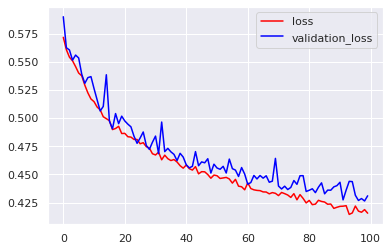

In [85]:
plt.plot(r_mm.history['loss'],label = 'loss',color = 'red')
plt.plot(r_mm.history['val_loss'],label = 'validation_loss',color = 'blue')
plt.legend()
plt.show()

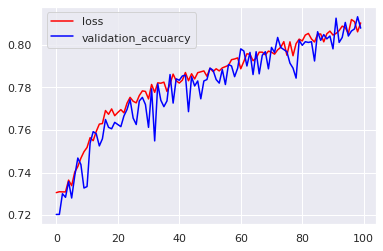

In [86]:
plt.plot(r_mm.history['accuracy'],label = 'loss',color = 'red')
plt.plot(r_mm.history['val_accuracy'],label = 'validation_accuarcy',color = 'blue')
plt.legend()
plt.show()

In [87]:
prediction = model.predict(X_test_mm)

In [88]:
prediction = (prediction > 0.5)

In [89]:
print(metrics.classification_report(y_test, prediction, target_names = ['Covid_Negative','Covid_Positive']))

                precision    recall  f1-score   support

Covid_Negative       0.82      0.94      0.88      2148
Covid_Positive       0.76      0.46      0.57       834

      accuracy                           0.81      2982
     macro avg       0.79      0.70      0.72      2982
  weighted avg       0.80      0.81      0.79      2982



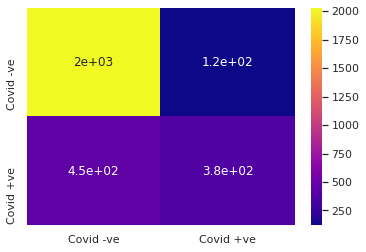

In [90]:
cn = metrics.confusion_matrix(y_test,prediction)
sn.heatmap(cn,annot=True,xticklabels=['Covid -ve','Covid +ve'],yticklabels=['Covid -ve','Covid +ve'],cmap = 'plasma')

In [91]:
df_covid = covid_df.drop(['parent_protein_id', 'protein_seq','peptide_seq'],axis = 1)
df_covid.head(3)

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,1,5,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,2,6,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,3,7,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603


In [92]:
df_covid = mm.transform(df_covid)

In [93]:
prediction_class = model.predict_classes(df_covid)
prediction_class

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [94]:
predictions_covid = pd.DataFrame(prediction_class,columns=['predicted_class'])

In [95]:
predictions_covid.head()

,predicted_class
0,0
1,0
2,0
3,0
4,0


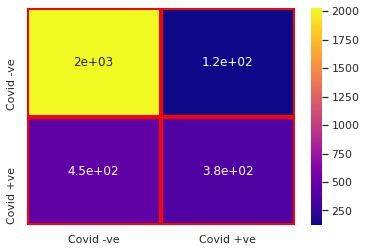

In [96]:
cn = metrics.confusion_matrix(y_test,prediction)
sn.heatmap(cn,annot=True,linecolor='red',linewidths=3,xticklabels=['Covid -ve','Covid +ve'],yticklabels=['Covid -ve','Covid +ve'],cmap='plasma')

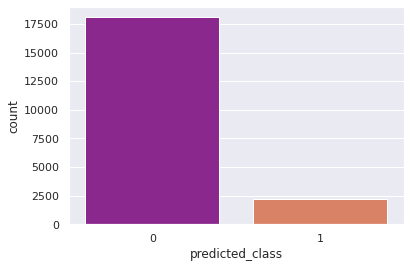

In [97]:
sn.countplot(data = predictions_covid,x = 'predicted_class',palette='plasma')

In [98]:
predictions_covid['predicted_class'].value_counts()

0    18084
1     2228
Name: predicted_class, dtype: int64

In [99]:
print(metrics.classification_report(y_test, prediction, target_names = ['Covid_Negative','Covid_Positive']))

                precision    recall  f1-score   support

Covid_Negative       0.82      0.94      0.88      2148
Covid_Positive       0.76      0.46      0.57       834

      accuracy                           0.81      2982
     macro avg       0.79      0.70      0.72      2982
  weighted avg       0.80      0.81      0.79      2982



In [100]:
X = df.iloc[:, 1:10].values
y = df.iloc[:, 10].values
X

array([[ 1.30500000e+03,  9.64000000e-01,  2.77000000e-01, ...,
         1.30624093e-01, -4.19738752e-01,  3.64318070e+01],
       [ 5.23000000e+02,  1.14200000e+00,  4.59000000e-01, ...,
         7.24907063e-02, -1.89591078e-01,  3.04420260e+01],
       [ 2.73000000e+02,  1.11300000e+00,  1.44000000e-01, ...,
         8.78594249e-02, -1.01437700e-01,  4.70062300e+01],
       ...,
       [ 1.44000000e+02,  1.14000000e+00,  1.21000000e+00, ...,
         5.66037736e-02, -7.06918239e-01,  7.66591824e+01],
       [ 1.97000000e+03,  1.02500000e+00,  9.33000000e-01, ...,
         1.19188504e-01, -3.18258664e-01,  3.65207016e+01],
       [ 3.05000000e+02,  1.00300000e+00,  9.75000000e-01, ...,
         7.37051793e-02,  1.63346614e-02,  1.46733068e+01]])

In [101]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [102]:
seed = 123
numpy.random.seed(seed)

In [103]:
#Initializing Artificial Neural Network
model = Sequential()

#Adding input layer
model.add(Dense(128, input_dim=9, kernel_initializer='normal', activation='relu'))

# Adding the second hidden layer
model.add(Dense(256, kernel_initializer='uniform', activation='relu'))

# Adding the Third hidden layer
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling Neural Network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


In [105]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.33, random_state=seed)

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, 
          batch_size=32, verbose=True, callbacks=[best_model, early_stop])

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6016 - accuracy: 0.7235 - val_loss: 0.6058 - val_accuracy: 0.7321
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5829 - accuracy: 0.7269 - val_loss: 0.5814 - val_accuracy: 0.7321
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5745 - accuracy: 0.7271 - val_loss: 0.5756 - val_accuracy: 0.7321
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5723 - accuracy: 0.7270 - val_loss: 0.5704 - val_accuracy: 0.7321
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5713 - accuracy: 0.7274 - val_loss: 0.5719 - val_accuracy: 0.7321
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5676 - accuracy: 0.7271 - val_loss: 0.5657 - val_accuracy: 0.7325
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5656 - accuracy: 0.7276 - val_loss: 0.5637 - val_accuracy: 0.7321

In [106]:
score = model.evaluate(X_val, Y_val, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)

154/154 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7337
Accuracy:  73.37398529052734
loss: 55.82619309425354


In [107]:
#Final Artificial Neural Networks for Prediction

In [108]:
y= df['target']

X = df.drop(['target'],axis = 1)

In [109]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape

(11925, 10)

In [110]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
model = Sequential()
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#Early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [112]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
373/373 [==============================] - 1s 3ms/step - loss: 0.5646 - accuracy: 0.7271 - val_loss: 0.5433 - val_accuracy: 0.7374
Epoch 2/150
373/373 [==============================] - 1s 3ms/step - loss: 0.5468 - accuracy: 0.7337 - val_loss: 0.5382 - val_accuracy: 0.7522
Epoch 3/150
373/373 [==============================] - 1s 3ms/step - loss: 0.5309 - accuracy: 0.7417 - val_loss: 0.5135 - val_accuracy: 0.7555
Epoch 4/150
373/373 [==============================] - 1s 3ms/step - loss: 0.5127 - accuracy: 0.7513 - val_loss: 0.4972 - val_accuracy: 0.7713
Epoch 5/150
373/373 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7615 - val_loss: 0.4817 - val_accuracy: 0.7767
Epoch 6/150
373/373 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.7728 - val_loss: 0.4688 - val_accuracy: 0.7790
Epoch 7/150
373/373 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.7737 - val_loss: 0.4665 - val_accuracy: 0.7867

Epoch 58/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8509 - val_loss: 0.4009 - val_accuracy: 0.8216
Epoch 59/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8507 - val_loss: 0.3970 - val_accuracy: 0.8209
Epoch 60/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8471 - val_loss: 0.4002 - val_accuracy: 0.8219
Epoch 61/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8492 - val_loss: 0.3956 - val_accuracy: 0.8249
Epoch 62/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8485 - val_loss: 0.3959 - val_accuracy: 0.8249
Epoch 63/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8501 - val_loss: 0.3997 - val_accuracy: 0.8239
Epoch 64/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3340 - accuracy: 0.8496 - val_loss: 0.4004 - val_accuracy:

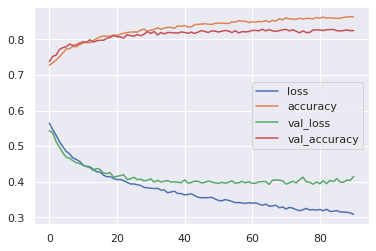

In [113]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [114]:
#predictions
predictions = model.predict_classes(X_test)

In [115]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2192
           1       0.73      0.54      0.62       790

    accuracy                           0.82      2982
   macro avg       0.79      0.73      0.75      2982
weighted avg       0.82      0.82      0.82      2982



In [116]:
print(classification_report(y_test, predictions, target_names = ['Covid_Negative','Covid_Positive']))

                precision    recall  f1-score   support

Covid_Negative       0.85      0.93      0.89      2192
Covid_Positive       0.73      0.54      0.62       790

      accuracy                           0.82      2982
     macro avg       0.79      0.73      0.75      2982
  weighted avg       0.82      0.82      0.82      2982



Text(65.59375, 0.5, 'Actual')

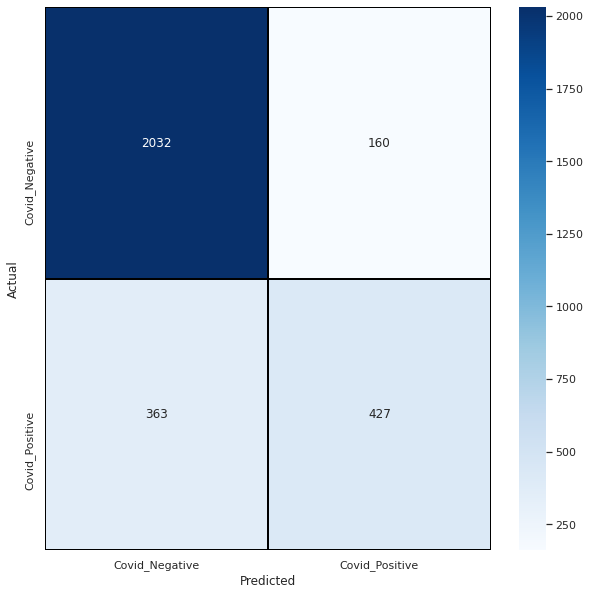

In [117]:
#confusion matrix
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Covid_Negative','Covid_Positive'] , yticklabels = ['Covid_Negative','Covid_Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

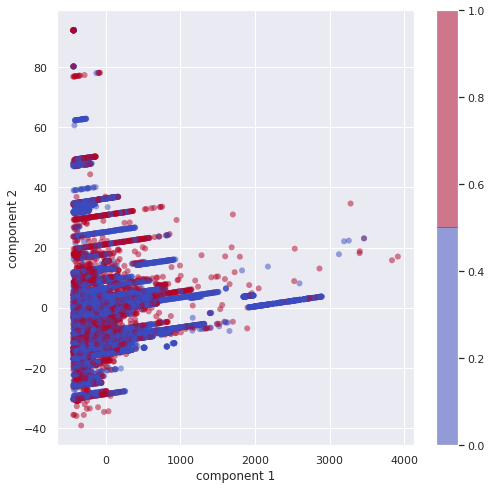

In [118]:
#Applying PCA
pca = PCA(n_components = 2)

projected = pca.fit_transform(df[['isoelectric_point', 'aromaticity', 
                                             'start_position', 'end_position', 
                                             'stability', 'hydrophobicity', 
                                             'emini', 'parker']])
plt.figure(figsize=(8,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [119]:
#Prediction for Covid dataset
covid_df_Pred = covid_df.drop(['parent_protein_id', 'protein_seq', 'peptide_seq'], axis = 1)
#transform data
covid_df_Pred = sc.transform(covid_df_Pred)
predictions_covid = model.predict_classes(covid_df_Pred)
predictions_covid

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [120]:
predictions_covid = pd.DataFrame(predictions_covid, columns = ['Predictions'])
#predictions_covid.head()
frames = [covid_df, predictions_covid]
output = pd.concat(frames, axis = 1)
output.head(10)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,Predictions
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603,0
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603,0
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603,0
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603,0
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603,0
5,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,6,10,SPGMP,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603,0
6,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,7,11,PGMPA,1.172,0.757,0.978,1.56,6.03595,0.10929,-0.138642,31.377603,0
7,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,8,12,GMPAL,0.986,0.403,1.016,-0.70,6.03595,0.10929,-0.138642,31.377603,0
8,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,9,13,MPALL,0.792,0.336,1.091,-3.68,6.03595,0.10929,-0.138642,31.377603,0
9,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,10,14,PALLS,0.958,0.455,1.128,-1.54,6.03595,0.10929,-0.138642,31.377603,0


In [ ]:
#Unsupervised Machine Learning

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

np.random.seed(5)

In [121]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns)
df.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,2.740223,2.747859,-0.249944,-0.441290,0.041022,-0.209838,0.754541,2.026787,-0.065368,-0.418510,-0.609935
1,0.558434,0.567374,1.189581,-0.341620,-1.044547,0.619079,0.670520,-0.176322,0.520556,-0.781504,-0.609935
2,-0.139069,-0.129712,0.955052,-0.514125,0.845840,-0.984005,-1.089352,0.406114,0.744982,0.222322,-0.609935
3,-0.423650,-0.414123,-0.872660,-0.548078,1.089157,-1.458329,-0.556984,0.103776,0.106152,0.003042,-0.609935
4,-0.066528,-0.057215,-0.233769,-0.474695,0.415356,-0.301940,-1.130483,-0.205585,-0.781629,0.214384,-0.609935


In [122]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=2)
km.fit(df)

KMeans(init='random', n_clusters=2)

In [123]:
km.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [124]:
km.cluster_centers_

array([[-0.26085476, -0.26182943,  0.5997142 ,  0.39380938, -0.68634996,
         0.74309477,  0.29172108, -0.41426261, -0.45136333,  0.36257852,
         0.03287151],
       [ 0.1822357 ,  0.18291662, -0.41896624, -0.27511911,  0.47949084,
        -0.51913332, -0.20379922,  0.28940794,  0.31532686, -0.25330093,
        -0.02296436]])

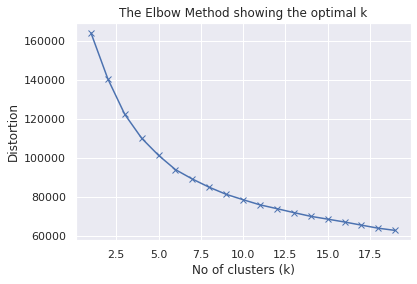

In [125]:
# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

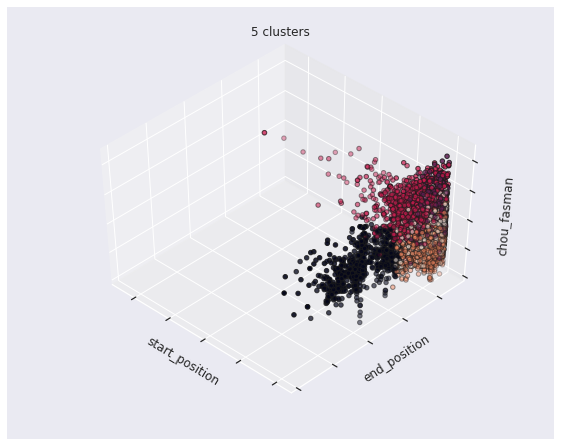

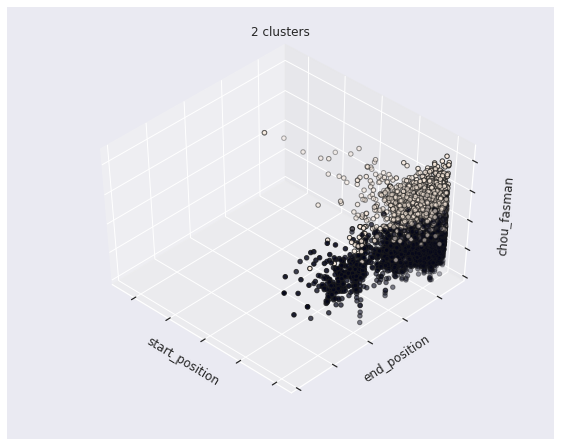

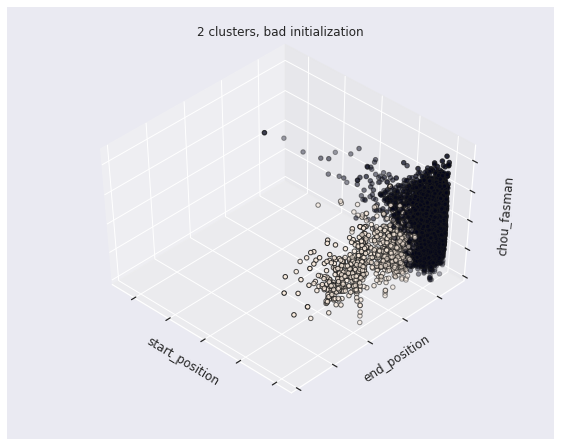

In [129]:
estimators = [('k_means_5', KMeans(n_clusters=5, init='k-means++')),
              ('k_means_2', KMeans(n_clusters=2, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=2, n_init=1, init='random'))]

fignum = 1
titles = ['5 clusters', '2 clusters', '2 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(df)
    labels = est.labels_

    ax.scatter(df.values[:, 3], df.values[:, 0], df.values[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('start_position')
    ax.set_ylabel('end_position')
    ax.set_zlabel('chou_fasman')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [130]:
#Hierarchical Clustering or Agglomerative clustering.

In [131]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering

AgglomerativeClustering()

In [132]:
clustering.labels_

array([0, 1, 0, ..., 1, 0, 0])

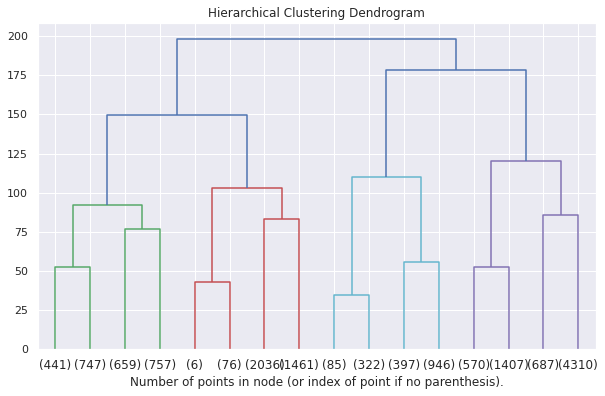

In [133]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

plt.figure(fignum, figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()